In [1]:
import pandas as pd
from statistics import mean

In [2]:
# use the date column as the index column
weather = pd.read_csv("nashville_weather.csv", index_col="DATE")
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1990-01-01,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",50.0,80.0,7.38,553.0,334.0,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1990-01-02,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",70.0,70.0,6.26,1251.0,1448.0,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",90.0,100.0,10.07,1150.0,1903.0,0.00,NaN,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",100.0,100.0,12.53,454.0,403.0,0.63,NaN,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",100.0,100.0,5.37,2350.0,2105.0,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-10,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",NaN,NaN,3.36,NaN,NaN,0.03,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-11,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",NaN,NaN,8.50,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-12,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",NaN,NaN,6.26,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Overview of Missing Data

Core values according to the data documentation: </br>
PRCP = Precipitation </br>
SNOW = Snowfall amount </br>
SNWD = Snow depth </br>
TMAX = Temperature Max </br>
TMIN = Temperature Min

In [3]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

Rename columns for better readability

In [4]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1990-01-01,0.00,0.0,0.0,44,24
1990-01-02,0.00,0.0,0.0,48,23
1990-01-03,0.00,0.0,0.0,59,39
1990-01-04,0.63,0.0,0.0,64,39
1990-01-05,0.00,0.0,0.0,46,39
...,...,...,...,...,...
2022-12-10,0.03,0.0,0.0,57,48
2022-12-11,0.00,0.0,0.0,53,47
2022-12-12,0.00,0.0,0.0,57,41


## Deal with missing values

In [5]:
# check for null values in core weather
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.000166
snow          0.035477
snow_depth    0.272433
temp_max      0.000000
temp_min      0.000000
dtype: float64

### Snow: Not this method

print("Number of empty snow rows: ", core_weather['snow'].apply(pd.isnull).sum())
core_weather.loc[core_weather['snow'].isna()]

Fill each date's value with mean snow data from other years on that same date.

for index in core_weather.loc[core_weather['snow'].isna()].index:
    date_wo_year = index[4:]
    
    if date_wo_year == '-02-29': # in case of 29-Feb, take data from 28-Feb in all years
        date_wo_year = '02-28'

    # skip first and last year in dataset since they do no have all dates
    all_years_with_that_day = [f'{yr}{date_wo_year}' for yr in range(int(core_weather.index[1][:4]), int(core_weather.index[-2][:4]))]
    print(mean([core_weather['snow'][yr] for yr in all_years_with_that_day]))
    core_weather.loc[index,'snow'] = mean([core_weather['snow'][yr] for yr in all_years_with_that_day])

### Snow
First let's deal with empty snow rows

In [6]:
print("Number of empty snow rows: ", core_weather['snow'].apply(pd.isnull).sum())
core_weather[core_weather['snow'].isna()]

Number of empty snow rows:  427


,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1997-04-01,0.00,NaN,NaN,63,35
1997-04-02,0.00,NaN,NaN,70,37
1997-04-03,0.00,NaN,NaN,76,39
1997-04-04,0.00,NaN,NaN,71,47
1997-04-05,0.39,NaN,NaN,75,62
...,...,...,...,...,...
2005-11-26,0.00,NaN,NaN,68,27
2005-11-27,0.03,NaN,NaN,63,53
2005-11-28,1.13,NaN,NaN,71,48


Too many rows to just delete. Let's look at data before and after the missing values.

In [7]:
core_weather["1997-03-25":"1997-05-05"]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1997-03-25,0.64,0.0,NaN,74,45
1997-03-26,0.00,0.0,NaN,61,41
1997-03-27,0.00,0.0,NaN,71,35
1997-03-28,0.33,0.0,NaN,81,55
1997-03-29,0.00,0.0,NaN,69,51
1997-03-30,0.05,0.0,NaN,66,43
1997-03-31,0.00,0.0,NaN,58,39
1997-04-01,0.00,NaN,NaN,63,35
1997-04-02,0.00,NaN,NaN,70,37


Since snow is 0.0 before and after we might assume that snow is zero throughout the period with NaN snow_depth values. </br>

In [8]:
core_weather.loc["1997-03-25":"1997-05-05","snow"] = core_weather["1997-03-25":"1997-05-05"]["snow"].fillna(0)
core_weather.loc["1997-03-25":"1997-05-05"]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1997-03-25,0.64,0.0,NaN,74,45
1997-03-26,0.00,0.0,NaN,61,41
1997-03-27,0.00,0.0,NaN,71,35
1997-03-28,0.33,0.0,NaN,81,55
1997-03-29,0.00,0.0,NaN,69,51
1997-03-30,0.05,0.0,NaN,66,43
1997-03-31,0.00,0.0,NaN,58,39
1997-04-01,0.00,0.0,NaN,63,35
1997-04-02,0.00,0.0,NaN,70,37


In [9]:
# find nearest year with complete data
core_weather[core_weather['snow'].isna()]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2004-07-26,0.09,NaN,NaN,77,67
2004-07-27,0.00,NaN,NaN,82,66
2004-11-01,0.00,NaN,NaN,82,65
2004-11-02,0.02,NaN,NaN,76,57
2004-11-03,0.46,NaN,NaN,66,56
...,...,...,...,...,...
2005-11-26,0.00,NaN,NaN,68,27
2005-11-27,0.03,NaN,NaN,63,53
2005-11-28,1.13,NaN,NaN,71,48


Since there is too much empty snow data to go through, perhaps a better fix would be to use snow data from other years. </br>
It is clear that all the remaining missing snow data is from 2004 and 2005. So we can take 2003 data for 2004 and 2006 data for 2005.

In [10]:
# 2004 snow data
core_weather.loc["2004-07-26":"2004-12-31", "snow"] = core_weather["2003-07-26":"2003-12-31"]["snow"].values
core_weather[core_weather['snow'].isna()]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2005-01-01,0.00,NaN,NaN,69,50
2005-01-02,0.36,NaN,NaN,65,55
2005-01-03,0.00,NaN,NaN,64,53
2005-01-04,0.00,NaN,NaN,63,54
2005-01-05,0.02,NaN,NaN,64,56
...,...,...,...,...,...
2005-11-26,0.00,NaN,NaN,68,27
2005-11-27,0.03,NaN,NaN,63,53
2005-11-28,1.13,NaN,NaN,71,48


In [11]:
# 2005 snow data
core_weather.loc["2005-01-01":"2005-11-30", "snow"] = core_weather["2006-01-01":"2006-11-30"]["snow"].values

In [12]:
# now there is no empty snow data
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.000166
snow          0.000000
snow_depth    0.272433
temp_max      0.000000
temp_min      0.000000
dtype: float64

### Snow depth

Next, let's deal with empty snow depth data. </br>
Since there is too much empty snow_depth data, we'll exclude this column from the model.

In [13]:
del core_weather['snow_depth']

### Precipitation

Lastly, there is some missing precipitation data.

In [14]:
core_weather[core_weather['precip'].isna()]

,precip,snow,temp_max,temp_min
DATE,,,,
2020-12-30,NaN,0.0,68,38
2020-12-31,NaN,0.0,45,41


Since there are only 2 missing values, they will not significantly impact the model. we can look at the data around those dates and make assumptions.

In [15]:
core_weather["2020-12-25":"2021-01-05"]

,precip,snow,temp_max,temp_min
DATE,,,,
2020-12-25,0.00,0.0,27,17
2020-12-26,0.00,0.0,51,17
2020-12-27,0.00,0.0,62,31
2020-12-28,0.00,0.0,57,33
2020-12-29,0.00,0.0,52,28
2020-12-30,NaN,0.0,68,38
2020-12-31,NaN,0.0,45,41
2021-01-01,0.54,0.0,75,45
2021-01-02,0.02,0.0,53,42


The precipiation amount is 0.0 before those dates and non-zero afterwards. Let's just enter 0.0 for the missing locations.

In [16]:
core_weather["precip"].fillna(0.0, inplace=True)

All the missing data in core_weather has now been dealt with.

In [17]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
snow        0.0
temp_max    0.0
temp_min    0.0
dtype: float64

### Verify data  types

In [18]:
core_weather.dtypes

precip      float64
snow        float64
temp_max      int64
temp_min      int64
dtype: object

In [19]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12',
               '2022-12-13', '2022-12-14'],
              dtype='datetime64[ns]', name='DATE', length=12036, freq=None)

According to the data documentation '9999' indicates missing data.

In [20]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
snow        0
temp_max    0
temp_min    0
dtype: int64

## Data Analysis

<AxesSubplot:xlabel='DATE'>

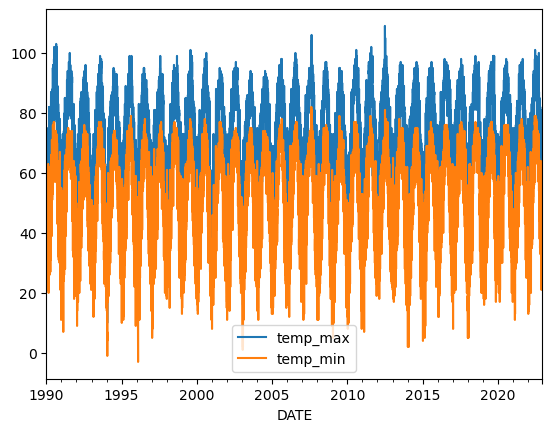

In [21]:
core_weather[['temp_max','temp_min']].plot()

<AxesSubplot:xlabel='DATE'>

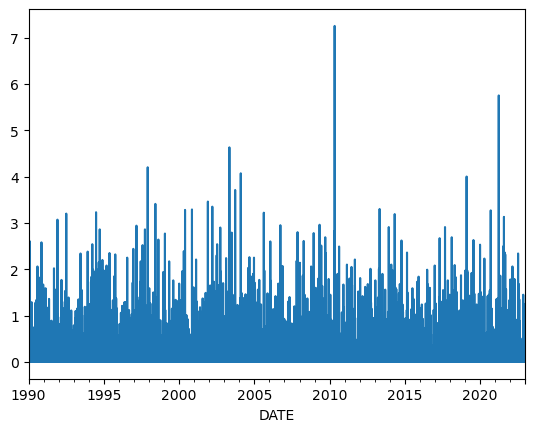

In [22]:
core_weather['precip'].plot()

There may be 2 outliers, but they shouldn't significantly impact the model so we can leave them as they are.

<AxesSubplot:xlabel='DATE'>

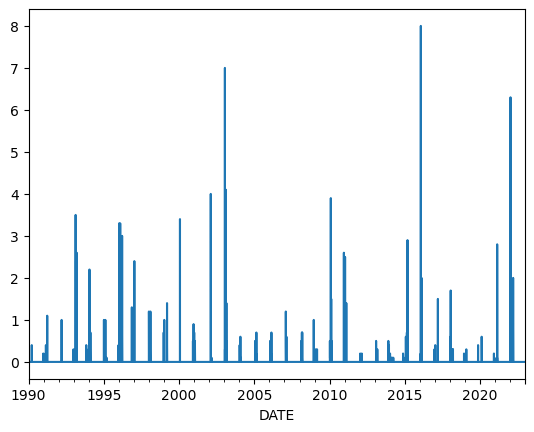

In [23]:
core_weather['snow'].plot()

## Training the ML model

Goal: Predict next day's temp_max using previous years' data

In [24]:
core_weather['target'] = core_weather.shift(-1)['temp_max']
# remove the last row since it'll have an empty target value
core_weather = core_weather.iloc[:-1, :].copy()
core_weather

,precip,snow,temp_max,temp_min,target
DATE,,,,,
1990-01-01,0.00,0.0,44,24,48.0
1990-01-02,0.00,0.0,48,23,59.0
1990-01-03,0.00,0.0,59,39,64.0
1990-01-04,0.63,0.0,64,39,46.0
1990-01-05,0.00,0.0,46,39,46.0
...,...,...,...,...,...
2022-12-09,0.00,0.0,61,51,57.0
2022-12-10,0.03,0.0,57,48,53.0
2022-12-11,0.00,0.0,53,47,57.0


In [25]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [26]:
predictors = ['precip', 'snow', 'temp_max', 'temp_min']

Use old data as training data and recent data as test set.

In [27]:
train = core_weather.loc[:'2020-12-31']
test = core_weather.loc['2021-01-01':]

In [28]:
reg.fit(train[predictors], train['target'])
predictions = reg.predict(test[predictors])

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test['target'], predictions)

5.666408935624479

In [30]:
# predictions is a numpy array, convert it to pd series and concatenate to dataframe
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'predictions']
combined

,actual,predictions
DATE,,
2021-01-01,53.0,71.035454
2021-01-02,50.0,56.918277
2021-01-03,58.0,52.577814
2021-01-04,52.0,57.718128
2021-01-05,48.0,54.117910
...,...,...
2022-12-09,57.0,64.625831
2022-12-10,53.0,61.016284
2022-12-11,57.0,58.086785


[-4.0893106  -2.10428136  0.70870843  0.21734444]


<AxesSubplot:xlabel='DATE'>

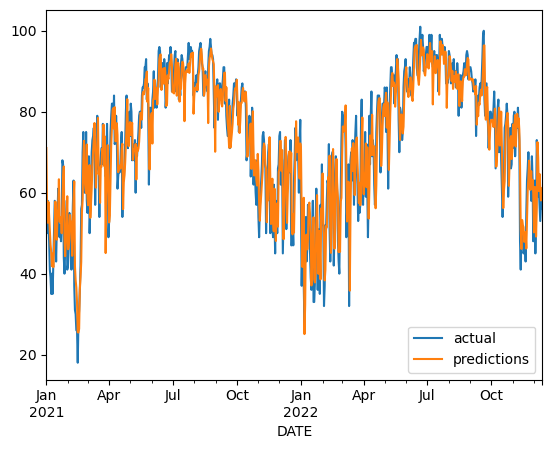

In [31]:
print(reg.coef_)
combined.plot()

In [32]:
# write a function to create predictions
def create_predictions(predictors, core_weather, reg):

    # split train and test data
    train = core_weather.loc[:'2020-12-31']
    test = core_weather.loc['2021-01-01':]

    # train model and get predictions
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])

    # find error in predictions
    error = mean_absolute_error(test['target'], predictions)

    # combine predictions with actual values
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']

    return error, combined

Add a rolling mean of past 30 days.

In [33]:
core_weather['month_max'] = core_weather['temp_max'].rolling(30).mean()

Add more columns of predictors for better predictions.

In [34]:
core_weather['month_day_max'] = core_weather['month_max'] / core_weather['temp_max']

Get rid of the first 30 rows since they will have NaN month_max values.

In [35]:
core_weather = core_weather.iloc[30:,:].copy()

Handle inf value of ratios

In [36]:
import numpy as np
import sys

core_weather.replace([np.inf, -np.inf], sys.float_info.max-1, inplace=True)

In [37]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip           0.0
snow             0.0
temp_max         0.0
temp_min         0.0
target           0.0
month_max        0.0
month_day_max    0.0
dtype: float64

In [38]:
predictors = ['precip', 'snow', 'temp_max', 'temp_min', 'month_max', 'month_day_max']
error, combined = create_predictions(predictors, core_weather, reg)

5.4216668421125185


<AxesSubplot:xlabel='DATE'>

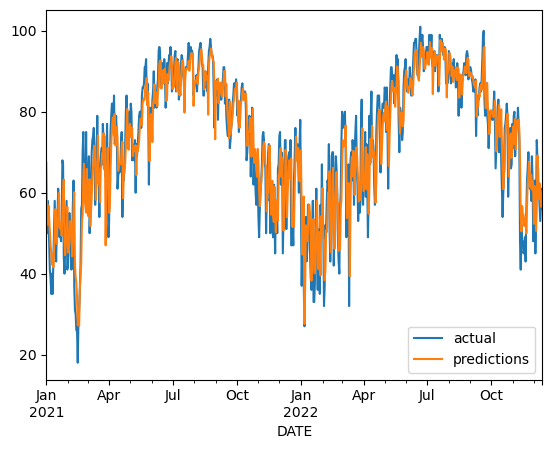

In [39]:
print(error)
combined.plot()

Prevent future data to influence past predictions

In [40]:
# avg temperature for that month from past data only
core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
# avg temperature for that day of the year from past years only
core_weather['day_of_year_avg'] = core_weather['temp_max'].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [41]:
predictors = ['precip', 'snow', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'monthly_avg', 'day_of_year_avg']
error, combined = create_predictions(predictors, core_weather, reg)

5.296054198848225


<AxesSubplot:xlabel='DATE'>

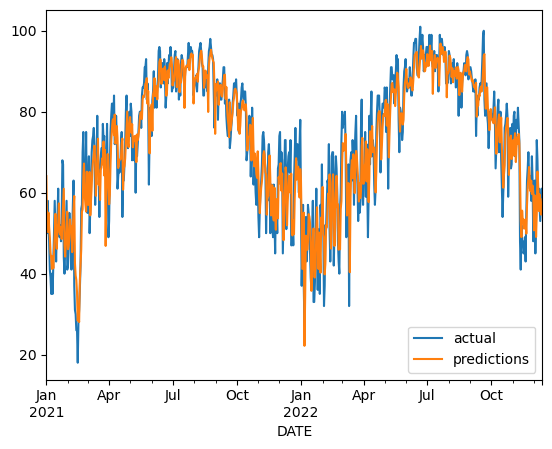

In [42]:
print(error)
combined.plot()

In [43]:
reg.coef_

array([-3.40681371, -2.77692296,  0.54768855,  0.07286481,  0.06608419,
       -1.88268603,  0.20183322,  0.10923202])

In [44]:
core_weather.corr()['target']

precip            -0.073248
snow              -0.152458
temp_max           0.900246
temp_min           0.843630
target             1.000000
month_max          0.825622
month_day_max     -0.413026
monthly_avg        0.843506
day_of_year_avg    0.858760
Name: target, dtype: float64